In [3]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk


def view_img(img_path):
    image = sitk.ReadImage(img_path)
    # image = sitk.Cast(sitk.RescaleIntensity(image), sitk.sitkFloat32)  # to [0, 255]
    image_data = sitk.GetArrayFromImage(image)  # N*H*W
    shape = image_data.shape
    if len(shape) == 2:
        print(image.shape)
        plt.imshow(image_data)
    elif len(shape) == 3:
        print(image_data.shape)
        plt.imshow(image[image.shape[0]//2])
    else:
        print(image_data.shape, " show image[0, :, :, :]")
        for i in range(image_data.shape[1]):
            plt.subplot( image_data.shape[1]//4+1, 4, i+1)
            plt.imshow(image_data[0][i])

    return image_data



In [4]:
img_path = r"E:\training\training\patient001\patient001_frame01.nii.gz"
view_img(img_path)

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: D:\a\1\sitk-build\ITK\Modules\IO\NIFTI\src\itkNiftiImageIO.cxx:1980:
ITK ERROR: ITK only supports orthonormal direction cosines.  No orthonormal definition found!

<class 'nibabel.nifti1.Nifti1Image'>
data shape (216, 256, 10)
affine: 
[[-1. -0.  0.  0.]
 [-0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 216 256  10   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [ 1.      1.5625  1.5625 10.      1.      1.      1.      1.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      

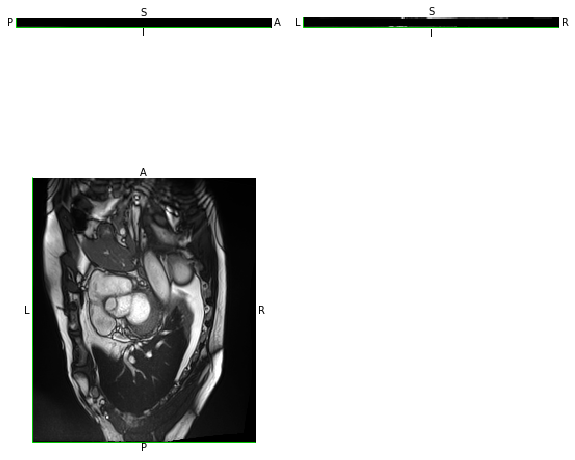

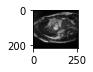

In [6]:
from matplotlib import pylab as plt
import nibabel as nib
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D

example_filename = r"E:\training\training\patient001\patient001_frame01.nii.gz"

img = nib.load(example_filename)
print (img)
print (img.header['db_name'])   # 输出头信息

# 由文件本身维度确定，可能是3维，也可能是4维
width,height,queue=img.dataobj.shape

OrthoSlicer3D(img.dataobj).show()

num = 1
for i in range(0,queue,10):

    img_arr = img.dataobj[:,:,i]
    plt.subplot(5,4,num)
    plt.imshow(img_arr,cmap='gray')
    num +=1

plt.show()

3967.0
{0.0, 1.0, 2.0, 3.0}


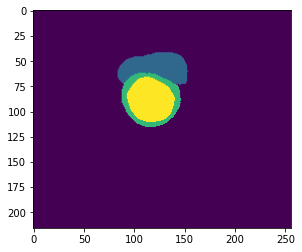

In [3]:
import numpy as np
img_arr = np.load(r"E:\ACDC\trainingset_L\gt\patient011_frame01_gt\patient011_frame01_gt_002.npy")
img_clip = np.clip(img_arr, 0,1)
print(np.sum(img_clip))
print(set(img_arr.reshape(-1)))
import matplotlib.pyplot as plt
plt.imshow(img_arr)

In [2]:
import numpy as np
x = np.ones((3, 3, 3))
y = np.pad(x, ((1, 0), (1, 0),(0,0)), constant_values=2)

In [4]:
y.shape

(4, 4, 3)

(216, 256)


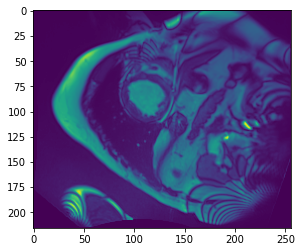

In [6]:
from matplotlib import pylab as plt
import nibabel as nib
import numpy as np
from scipy.ndimage import rotate
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D
example_filename = r"E:\ACDC\EStrainingset_L\src\patient011_frame08\patient011_frame08_005.npy"

img = np.load(example_filename)
print(img.shape)


def rotate_img(img, angle, bg_patch=(5,5)):
    assert len(img.shape) <= 3, "Incorrect image shape"
    print(img.shape)
    rgb = len(img.shape) == 3
    if rgb:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1], :], axis=(0,1))
    else:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1]])
    img = rotate(img, angle, reshape=False)
    mask = [img <= 0, np.any(img <= 0, axis=-1)][rgb]
    print(mask)
    # img[mask] = bg_color
    return img

plt.imshow(img)

(216, 256)
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


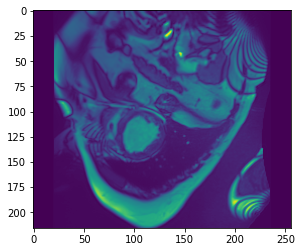

In [7]:

img = rotate_img(img, 90)
plt.imshow(img)

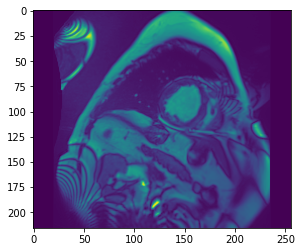

In [9]:
img = rotate(img, 90, reshape=False)
plt.imshow(img)

(216, 256)
OrderedDict([(1, True), (2, True), (3, True)])
{1: None, 2: 32, 3: None}
{1: 261, 2: 703, 3: 1095}


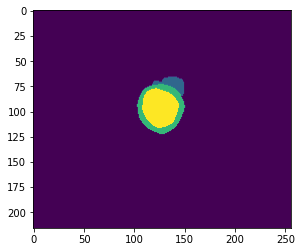

In [1]:
from matplotlib import pylab as plt
import nibabel as nib
import numpy as np
from scipy.ndimage import rotate
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D
from collections import OrderedDict
from skimage.morphology import label

example_filename = r"E:\ACDC\EStrainingset_L\src\patient011_frame08\patient011_frame08_005.npy"

img = np.load(example_filename)
print(img.shape)


def rotate_img(img, angle, bg_patch=(5,5)):
    assert len(img.shape) <= 3, "Incorrect image shape"
    print(img.shape)
    rgb = len(img.shape) == 3
    if rgb:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1], :], axis=(0,1))
    else:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1]])
    img = rotate(img, angle, reshape=False)
    mask = [img <= 0, np.any(img <= 0, axis=-1)][rgb]
    img[mask] = bg_color
    return img


#img = rotate_img(img, 30)
#plt.imshow(img)

pkl_path = r"E:\ACDC\trainingset\properties\patient001_frame01_gt\patient001_frame01_002.pkl"

import pickle
with open (pkl_path, 'rb') as f:
  pkl = pickle.load(f)

#print(pkl)


img_path = r"E:\ACDC\EDtrainingset\gt\patient002_frame01_gt\patient002_frame01_gt_003.npy"
seg = np.load(img_path)

def check_if_all_in_one_region(seg, all_classes):
    regions = list()
    for c in all_classes:
        regions.append(c)

    res = OrderedDict()
    for r in regions:
        new_seg = np.zeros(seg.shape)
        new_seg[seg == c] = 1
        labelmap, numlabels = label(new_seg, return_num=True)
        if numlabels != 1:
            res[r] = False
        else:
            res[r] = True
    return res

print(check_if_all_in_one_region(seg, [1,2,3]))


def remove_all_but_the_largest_connected_component(image: np.ndarray, for_which_classes: list,
                                                   minimum_valid_object_size: dict = None):
    """
    removes all but the largest connected component, individually for each class
    :param image:
    :param for_which_classes: can be None. Should be list of int. Can also be something like [(1, 2), 2, 4].
    Here (1, 2) will be treated as a joint region, not individual classes (example LiTS here we can use (1, 2)
    to use all foreground classes together)
    :param minimum_valid_object_size: Only objects larger than minimum_valid_object_size will be removed. Keys in
    minimum_valid_object_size must match entries in for_which_classes
    :return:
    """
    if for_which_classes is None:
        for_which_classes = np.unique(image)
        for_which_classes = for_which_classes[for_which_classes > 0]

    assert 0 not in for_which_classes, "cannot remove background"
    largest_removed = {}
    kept_size = {}
    for c in for_which_classes:
        if isinstance(c, (list, tuple)):
            c = tuple(c)  # otherwise it cant be used as key in the dict
            mask = np.zeros_like(image, dtype=bool)
            for cl in c:
                mask[image == cl] = True
        else:
            mask = image == c
        # get labelmap and number of objects
        lmap, num_objects = label(mask.astype(int), return_num=True)

        # collect object sizes
        object_sizes = {}
        for object_id in range(1, num_objects + 1):
            object_sizes[object_id] = (lmap == object_id).sum()

        largest_removed[c] = None
        kept_size[c] = None

        if num_objects > 0:
            # we always keep the largest object. We could also consider removing the largest object if it is smaller
            # than minimum_valid_object_size in the future but we don't do that now.
            maximum_size = max(object_sizes.values())
            kept_size[c] = maximum_size

            for object_id in range(1, num_objects + 1):
                # we only remove objects that are not the largest
                # if object_sizes[object_id] != maximum_size:
                if object_sizes[object_id] < 0.2 * maximum_size:
                    # we only remove objects that are smaller than minimum_valid_object_size
                    remove = True
                    if minimum_valid_object_size is not None:
                        remove = object_sizes[object_id] < minimum_valid_object_size[c]
                    if remove:
                        image[(lmap == object_id) & mask] = 0
                        if largest_removed[c] is None:
                            largest_removed[c] = object_sizes[object_id]
                        else:
                            largest_removed[c] = max(largest_removed[c], object_sizes[object_id])
    return image, largest_removed, kept_size

image = np.load(r"D:\Segmentation_framework_results_ED_central_central\pred_seg_np\pred_seg_np_patient008_frame01.npy_007.npy")
image, largest_removed, kept_size = remove_all_but_the_largest_connected_component(image, for_which_classes=[1,2,3])

plt.imshow(image)
print(largest_removed)
print(kept_size)

In [10]:
from batchgenerators.augmentations.utils import pad_nd_image
import numpy as np
image = np.random.rand(222, 227)
print(image.shape)
image_r, slicer = pad_nd_image(image, return_slicer=True, shape_must_be_divisible_by=[8, 16])

(222, 227)


In [11]:
print(image_r.shape)
print(slicer)

(224, 240)
[slice(1, 223, None), slice(6, 233, None)]


In [12]:
image_r[slicer[0]][slicer[1]].shape

(216, 240)